In [52]:
# In this Exploratory Data Analysis, we will try to:
# 1. Identify common issues faced by different users.
# 4. Segment customers based on their ticket types, issues, or satisfaction levels.
# 5. We will also try to give recommendation so that users do not ask for the refund which can lead to loss of revenue.

In [53]:
# The dataset is given on this URL: https://www.kaggle.com/datasets/suraj520/customer-support-ticket-dataset?select=customer_support_tickets.csv
# Before reading the data, please download it using the above gievn URL.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv("customer_support_tickets.csv")
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


## Fixing the Rows and Columns

In [56]:
# For our analysis, we do not need the Ticket ID variable in our data and we can just simply remove it.
data.drop("Ticket ID", axis = 1,inplace = True)

In [57]:
# For our analysis, we will need to create two new columns containng the months and years in which the product was purchased.

data['Year'] = pd.DatetimeIndex(data['Date of Purchase']).year
data['Month'] = pd.DatetimeIndex(data['Date of Purchase']).month

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer Name                 8469 non-null   object 
 1   Customer Email                8469 non-null   object 
 2   Customer Age                  8469 non-null   int64  
 3   Customer Gender               8469 non-null   object 
 4   Product Purchased             8469 non-null   object 
 5   Date of Purchase              8469 non-null   object 
 6   Ticket Type                   8469 non-null   object 
 7   Ticket Subject                8469 non-null   object 
 8   Ticket Description            8469 non-null   object 
 9   Ticket Status                 8469 non-null   object 
 10  Resolution                    2769 non-null   object 
 11  Ticket Priority               8469 non-null   object 
 12  Ticket Channel                8469 non-null   object 
 13  Fir

In [59]:
# data[data["First Response Time"].isna()]

In [60]:
# This is also very important statistic in order to know that average age of a user contacting the customer service is  44. It means that mostly working people are contacting the customer services.
data.describe()

,Customer Age,Customer Satisfaction Rating,Year,Month
count,8469.000000,2769.000000,8469.000000,8469.000000
mean,44.026804,2.991333,2020.499823,6.488842
std,15.296112,1.407016,0.500029,3.463969
min,18.000000,1.000000,2020.000000,1.000000
25%,31.000000,2.000000,2020.000000,3.000000
50%,44.000000,3.000000,2020.000000,7.000000
75%,57.000000,4.000000,2021.000000,10.000000
max,70.000000,5.000000,2021.000000,12.000000


## Data Cleaning 

In [61]:
# First we will convert the data types of some very important vartiables in our data.
data["Date of Purchase"] = pd.to_datetime(data["Date of Purchase"])

In [62]:
data["First Response Time"] = pd.to_datetime(data["First Response Time"])

In [63]:
data["Time to Resolution"] = pd.to_datetime(data["Time to Resolution"])

In [64]:
# Now we will add a new column to categorize the users on the basis of age.
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

# Create a new column with age ranges
data['Age Range'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)


In [65]:
# All other variables seem to have correct data type. Now we can move forward to handle the missing values in our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Customer Name                 8469 non-null   object        
 1   Customer Email                8469 non-null   object        
 2   Customer Age                  8469 non-null   int64         
 3   Customer Gender               8469 non-null   object        
 4   Product Purchased             8469 non-null   object        
 5   Date of Purchase              8469 non-null   datetime64[ns]
 6   Ticket Type                   8469 non-null   object        
 7   Ticket Subject                8469 non-null   object        
 8   Ticket Description            8469 non-null   object        
 9   Ticket Status                 8469 non-null   object        
 10  Resolution                    2769 non-null   object        
 11  Ticket Priority               

### Handling Missing Values

In [66]:
# First we will look at the basic information of our data to get the idea of missing vclues and data types variables.
# After looking at the data, it is clear that we do not have missing values in most of the columns.
# In some of the variables, we do have the missing values but these missing values are missing not at random and there is a specific reason behind the missing value. We will check the reason behind it later in the analysis.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Customer Name                 8469 non-null   object        
 1   Customer Email                8469 non-null   object        
 2   Customer Age                  8469 non-null   int64         
 3   Customer Gender               8469 non-null   object        
 4   Product Purchased             8469 non-null   object        
 5   Date of Purchase              8469 non-null   datetime64[ns]
 6   Ticket Type                   8469 non-null   object        
 7   Ticket Subject                8469 non-null   object        
 8   Ticket Description            8469 non-null   object        
 9   Ticket Status                 8469 non-null   object        
 10  Resolution                    2769 non-null   object        
 11  Ticket Priority               

## Univariate Analysis: We will try to analyse each variable so that we can get the maximum actionable insights from our data. 

In [67]:
# It is clear from this data that the number of user who are dissatisfied with the customer service is more than satisfied users. 
data["Status"] = data["Customer Satisfaction Rating"].map({1.0:"DSAT",2.0:"DSAT",3.0:"Neutral",4.0:"CSAT",5.0:"CSAT"})
data["Status"].value_counts()

Status
DSAT       1102
CSAT       1087
Neutral     580
Name: count, dtype: int64

### Every customer service wants to reduce the proportion of the DSATs in the total surveys and want to increase the proportion of CSATs. We will see what this company should for the same

In [68]:
# By looking at this data it is clear that user are spread across different range of age excpt we do not have any user below 18 and most users are from the age of 19-30
# We can say that each represenstative should be given a proper training of customer handling to handle the emotions of user from different age category.
data["Age Range"].value_counts(ascending = False)

Age Range
19-30    1928
61+      1731
51-60    1669
41-50    1585
31-40    1556
0-18        0
Name: count, dtype: int64

<Axes: xlabel='Age Range'>

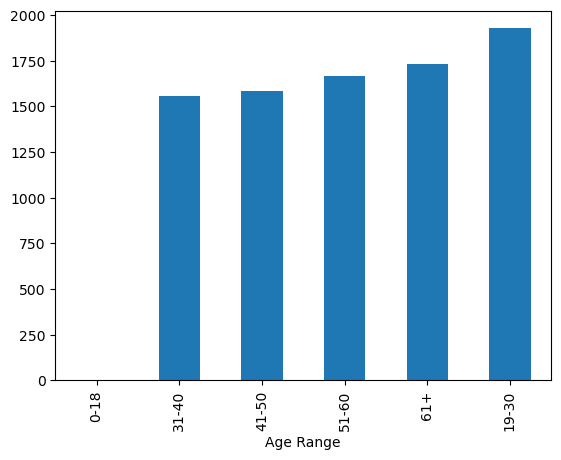

In [69]:
# Visual representation of user distribution in different age range
data["Age Range"].value_counts(ascending = True).plot.bar()


Text(0, 0.5, '')

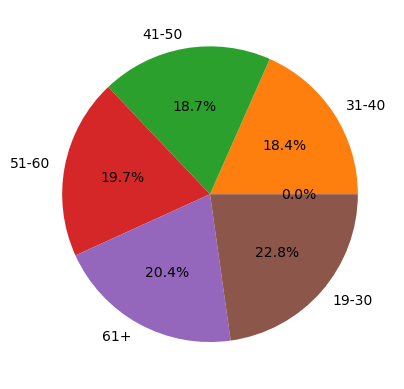

In [70]:
# Proportional representation of users' distribution in different age range

data["Age Range"].value_counts(ascending = True).plot.pie(autopct='%1.1f%%')
plt.ylabel("")

In [28]:
# As we can see there is not much difference in the distribution between the different categories of gender.
data["Customer Gender"].value_counts()

Customer Gender
Male      2896
Female    2887
Other     2686
Name: count, dtype: int64

Text(0, 0.5, '')

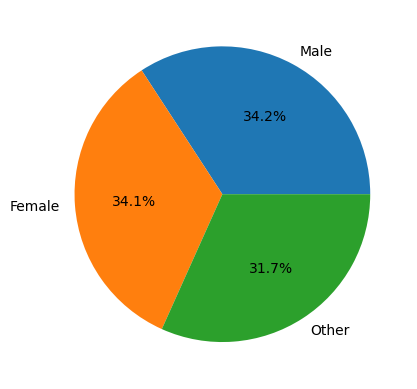

In [29]:
data["Customer Gender"].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel("")

In [30]:
data["Product Purchased"].value_counts()

Product Purchased
Canon EOS                         240
GoPro Hero                        228
Nest Thermostat                   225
Philips Hue Lights                221
Amazon Echo                       221
LG Smart TV                       219
Sony Xperia                       217
Roomba Robot Vacuum               216
Apple AirPods                     213
LG OLED                           213
iPhone                            212
Sony 4K HDR TV                    210
Garmin Forerunner                 208
LG Washing Machine                208
Canon DSLR Camera                 206
Nikon D                           204
Nintendo Switch Pro Controller    203
Google Pixel                      203
Fitbit Charge                     202
Sony PlayStation                  202
HP Pavilion                       200
Microsoft Office                  200
Amazon Kindle                     198
Google Nest                       198
Dyson Vacuum Cleaner              198
Bose SoundLink Speaker          

In [31]:
data.head()

,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Year,Month,Age Range,Status
0,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN,2021,3,31-40,NaN
1,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN,2021,5,41-50,NaN
2,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,41-50,Neutral
3,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2020,11,19-30,Neutral
4,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2020,2,61+,DSAT


In [32]:
# Now we will check the demand of products in different months
# We will convert the demand of units and product into a dataframe so that we can check the demand as a timesries variable.
demand = data["Month"].value_counts()
demand_df = demand.reset_index()
demand_df.columns = ['Month', 'Demand in Units']
demand_df = demand_df.sort_values(by = "Month")
demand_df

,Month,Demand in Units
0,1,736
4,2,715
11,3,672
3,4,718
6,5,701
10,6,678
2,7,727
9,8,691
7,9,696
1,10,735


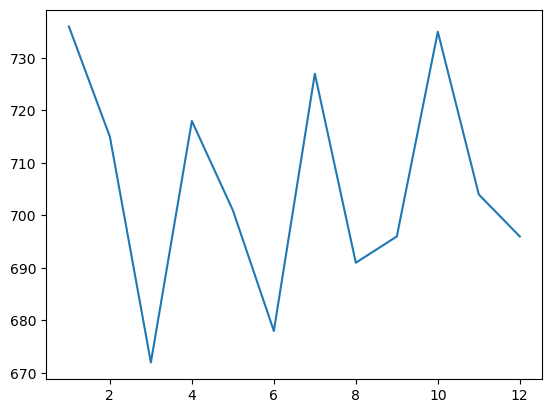

In [33]:
# Visual representation of the Product purchased by the users in different months. We can see that there is no pattern the demand. It could be due to the fact that we have different types of prodct categories.
plt.plot(demand_df.Month, demand_df["Demand in Units"])


<Axes: xlabel='Month', ylabel='Demand in Units'>

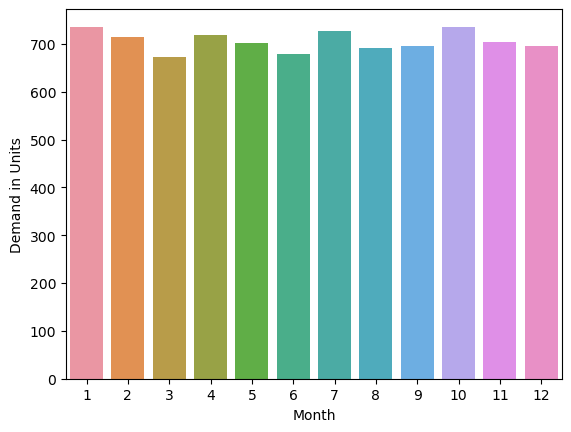

In [34]:
sns.barplot(data=demand_df, x="Month", y="Demand in Units")

In [35]:
# In terms of year, we have equal number of products sold in the market.
data.Year.value_counts()

Year
2020    4236
2021    4233
Name: count, dtype: int64

In [36]:
# As we can check the most of the queries are related to the refund. We will later try to find why most of the user are asking for the refund. 
data["Ticket Type"].value_counts()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

In [37]:
# These are the user with high churn probabilty. The company needs to focus more on their issues first and the Ticket Priority should be critical
refund = data[data["Ticket Type"]=="Refund request"]
refund.head()

,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Year,Month,Age Range,Status
7,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaT,NaT,NaN,2020,8,19-30,NaN
9,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 09:25:48,NaT,NaN,2020,3,19-30,NaN
19,Jeffrey Robertson,jameslopez@example.com,39,Female,Canon EOS,2021-03-08,Refund request,Software bug,I'm having an issue with the {product_purchase...,Closed,Wish mouth build resource though.,Low,Chat,2023-06-01 00:46:04,2023-06-01 20:29:04,5.0,2021,3,31-40,CSAT
20,Suzanne Holmes,rogermcgrath@example.net,28,Other,HP Pavilion,2021-05-31,Refund request,Payment issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Chat,2023-06-01 05:08:05,NaT,NaN,2021,5,19-30,NaN
33,Timothy Lyons,darlenelee@example.org,50,Male,Autodesk AutoCAD,2021-12-09,Refund request,Hardware issue,I'm having an issue with the {product_purchase...,Closed,However financial development significant came...,Critical,Social media,2023-06-01 02:01:23,2023-06-01 18:25:23,5.0,2021,12,51-60,CSAT


In [38]:
# some of the cases have already been closed. So company can not do anything regarding them except providing a better product service in the future.
# We have still have many users who are asking for the refund due to vartious reason. Only few of them came for the refund. Most of the people are asking for the refund due to technical issues with the product that company should work upon.
refund["Ticket Status"].value_counts()


Ticket Status
Closed                       596
Pending Customer Response    592
Open                         564
Name: count, dtype: int64

In [39]:
# Here we can see that most of the refund request came bacause of the poor service delivery that each user expects from a company.
refund["Ticket Subject"].value_counts()

Ticket Subject
Hardware issue              129
Battery life                119
Installation support        119
Refund request              119
Software bug                112
Cancellation request        109
Account access              108
Product compatibility       107
Network problem             107
Delivery problem            107
Peripheral compatibility    106
Product recommendation      106
Payment issue               104
Product setup               104
Display issue                99
Data loss                    97
Name: count, dtype: int64

In [40]:
# These are the customers the comapny can assist with their technical issue to convert their refund queries into technical issue query that will retain these user for the long term.
refund_opened = refund[refund["Ticket Status"] != "Closed"]
refund_opened.head()

,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Year,Month,Age Range,Status
7,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaT,NaT,NaN,2020,8,19-30,NaN
9,William Dawson,clopez@example.com,27,Male,Dyson Vacuum Cleaner,2020-03-06,Refund request,Payment issue,My {product_purchased} is making strange noise...,Pending Customer Response,NaN,Critical,Phone,2023-06-01 09:25:48,NaT,NaN,2020,3,19-30,NaN
20,Suzanne Holmes,rogermcgrath@example.net,28,Other,HP Pavilion,2021-05-31,Refund request,Payment issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Chat,2023-06-01 05:08:05,NaT,NaN,2021,5,19-30,NaN
34,Stacy Jones,fernandezmark@example.org,27,Male,Microsoft Xbox Controller,2021-04-09,Refund request,Installation support,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Low,Chat,2023-06-01 20:50:24,NaT,NaN,2021,4,19-30,NaN
36,Ruben Henry,katherinehoward@example.net,65,Female,Canon EOS,2020-03-14,Refund request,Hardware issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Medium,Email,2023-06-01 15:51:28,NaT,NaN,2020,3,61+,NaN


In [41]:
# As we can see here, the number of open cases are more than half of total case(PCR + Open+ closed)
# For better customer satisfaction, we always need to make sure that case cloure rate should be higher.
# By increasing the number of closed case, the probability of higher customer ratings or CSAT also increases.
data["Ticket Status"].value_counts()
opened_case = len(data[data["Ticket Status"] == "Open"]) + len(data[data["Ticket Status"] == "Pending Customer Response"])
Ratio_open_case = opened_case /  len(data["Ticket Status"]) * 100
Ratio_open_case

67.30428622033298

In [42]:
# Now we will try to find which medium is most populat among the users
data["Ticket Channel"].value_counts()
# We can see that there is no specific medium of contact that user prefer the most but we can say that sometimes, people do not prefer chat as a medium of contact.

Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64

<Axes: ylabel='count'>

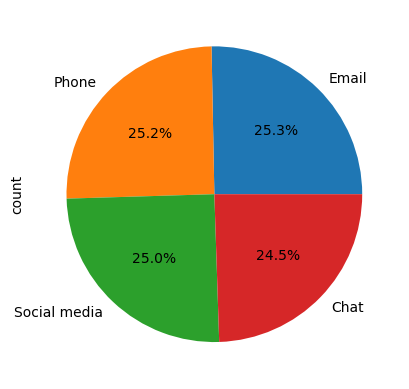

In [43]:
data["Ticket Channel"].value_counts().plot.pie(autopct='%1.1f%%')


In [44]:
data["Ticket Priority"].value_counts()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

In [45]:
# Now we will try to understand why the company is getting DSATs(in other terms where users are not satisfied with the customer services).
data["Customer Satisfaction Rating"].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

In [46]:
# In most of the organisation, the suvery ratings of 3 or below are considered to represent the customer dissatisfaction.
# We find out why users are giving very low ratings to the customer servies
DSAT = data[data["Customer Satisfaction Rating"]<= 3.0]
DSAT.head()

,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Year,Month,Age Range,Status
2,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2020,7,41-50,Neutral
3,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2020,11,19-30,Neutral
4,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2020,2,61+,DSAT
10,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,2021,1,41-50,DSAT
11,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,2021,10,51-60,DSAT


In [47]:
# By looking at the ticket subject variable, it is clear that most of the DSATs are coming becuase of the issue of Product compatibility.
# Each company shoul focus on making a product more user friendly and that can be used by different users.
DSAT["Ticket Subject"].value_counts()

Ticket Subject
Network problem             125
Product compatibility       122
Delivery problem            120
Product recommendation      116
Software bug                115
Hardware issue              112
Product setup               111
Account access              106
Battery life                104
Refund request              102
Peripheral compatibility    102
Payment issue                91
Installation support         91
Display issue                90
Cancellation request         88
Data loss                    87
Name: count, dtype: int64

In [48]:
# People from the age range of 19-30 and 61+ seem to be more dissatisfied here and we need to focus more on them.
DSAT["Age Range"].value_counts()

Age Range
19-30    362
61+      350
51-60    334
41-50    319
31-40    317
0-18       0
Name: count, dtype: int64

In [49]:
# Now we will also understand why user gives CSAT or shows satisfaction in customer services

csat = data[data["Customer Satisfaction Rating"]>3.0]
csat.head()

,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Year,Month,Age Range,Status
14,Amy Hill,medinasteven@example.net,48,Female,Sony PlayStation,2020-02-29,Billing inquiry,Product setup,I'm having an issue with the {product_purchase...,Closed,Officer moment world sing parent available.,High,Chat,2023-06-01 06:22:55,2023-05-31 23:08:55,4.0,2020,2,41-50,CSAT
16,Julia Salazar,watkinsbarbara@example.com,63,Other,Xbox,2021-10-13,Product inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Seek evidence book collection catch.,Critical,Chat,2023-06-01 19:46:59,2023-06-01 15:58:59,4.0,2021,10,61+,CSAT
19,Jeffrey Robertson,jameslopez@example.com,39,Female,Canon EOS,2021-03-08,Refund request,Software bug,I'm having an issue with the {product_purchase...,Closed,Wish mouth build resource though.,Low,Chat,2023-06-01 00:46:04,2023-06-01 20:29:04,5.0,2021,3,31-40,CSAT
28,Christine Wang,garciastacy@example.com,30,Other,Fitbit Charge,2020-06-10,Technical issue,Product recommendation,I'm having an issue with the {product_purchase...,Closed,Soldier we such inside.,Critical,Phone,2023-05-31 23:17:17,2023-06-01 06:03:17,5.0,2020,6,31-40,CSAT
33,Timothy Lyons,darlenelee@example.org,50,Male,Autodesk AutoCAD,2021-12-09,Refund request,Hardware issue,I'm having an issue with the {product_purchase...,Closed,However financial development significant came...,Critical,Social media,2023-06-01 02:01:23,2023-06-01 18:25:23,5.0,2021,12,51-60,CSAT


In [50]:
# As we can see that users from the same range of age are also giving the highest CSATs so companies should focus more on converting them from DSATs to CSATs.
csat["Age Range"].value_counts()

Age Range
19-30    234
61+      229
41-50    211
51-60    209
31-40    204
0-18       0
Name: count, dtype: int64

In [51]:
# By looking at this data, we can see that the number of DSAT increased in the year 2021 as compared to 2020 which is just opposite to the CSAT which were higher in 2020 and reduced in 2021
print("DSAT in different Years")
print(DSAT["Year"].value_counts())
print("")
print("CSAT in different Years")
print(csat["Year"].value_counts())

DSAT in different Years
Year
2021    863
2020    819
Name: count, dtype: int64

CSAT in different Years
Year
2020    584
2021    503
Name: count, dtype: int64


### After looking at the entire data we can say that there is very high level of DSATs that company should focus upon in the next years. 
1. Should focus on training representative to handle the users from different age categories
2. Should focus on reducing the time for the resolution.
3. Focus more on increasing the number of closed case. 